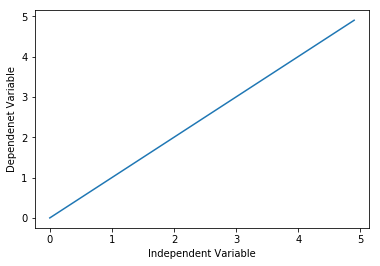

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline


     #Linear Regression


#TO DEMONSTRATE A LINEAR REGRESSION LINE WITH NUMPY AND MATPLOTLIB

a = 1
b = 0
X = np.arange(0.0, 5.0, 0.1)



Y = a*X + b

plt.plot(X, Y)
plt.ylabel('Dependenet Variable')
plt.xlabel('Independent Variable')
plt.show()




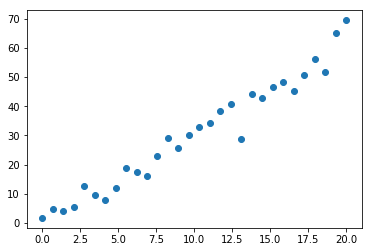

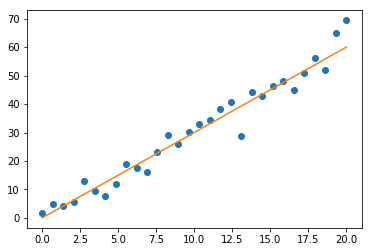

In [3]:
#TO DEMOSTRATE A LINEAR REGRESSION LINE TO FIT A DATASET WITH NUMPY AND MATPLOTLIB

n_samples = 30

#GENERATE SOME PIONTS
train_x = np.linspace(0, 20, n_samples)

#EQUATION OF A STRAIGTH LINE
#ADDING SOME NOISE: 4 * np.random.randn(n_samples)


train_y = 3 * train_x + 4 * np.random.randn(n_samples)


plt.plot(train_x, train_y, 'o')
#TO SHOW THE RANDOM NUMBER
plt.show()

#OUTPUT: THE RANDOM DATA ARE AROUND A LINE BUT SCATTERED



#THE EQUATION TO FIT THE LINE IS Y=3X
plt.plot(train_x, train_y, 'o')
plt.plot(train_x, 3 * train_x)
plt.show()

epoch: 0000 c=2.6799 w=1.9663 b=0.6653
epoch: 0020 c=0.2480 w=3.0594 b=0.6869
epoch: 0040 c=0.2473 w=3.0637 b=0.6198
epoch: 0060 c=0.2466 w=3.0678 b=0.5561
epoch: 0080 c=0.2461 w=3.0717 b=0.4957
epoch: 0100 c=0.2456 w=3.0754 b=0.4384
epoch: 0120 c=0.2451 w=3.0789 b=0.3839
epoch: 0140 c=0.2447 w=3.0822 b=0.3323
epoch: 0160 c=0.2444 w=3.0854 b=0.2832
epoch: 0180 c=0.2441 w=3.0884 b=0.2367


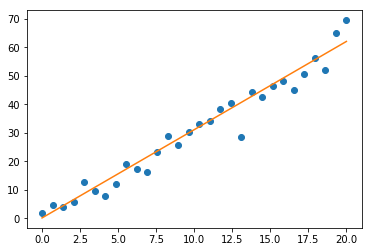

In [4]:
#TO DEMOSTRATE A LINEAR REGRESSION LINE TO FIT A DATASET WITH TENSORFLOW




learning_rate = 0.01
epochs = 200

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

#WEIGHTS AND BIAS
W = tf.Variable(np.random.randn(), name='weights')
B = tf.Variable(np.random.randn(), name='bias')

pred = X * W + B
#OR
# pred = tf.add(tf.multiply(X, W), B)



#DEFINE LOSS OR COST AND USE THE LINEAR REGRESSION LOSS FORMULAR(TF.REDUCE MEAN) ON IT

#cost = tf.reduce_sum((pred - Y) ** 2) / (2 * n_samples)
#or
cost =tf.reduce_mean(tf.square(pred - Y))/ (2 * n_samples)


#Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
#initialise variable
init = tf.global_variables_initializer()

#run session and plot
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        for x, y in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
        if not epoch % 20:
            c = sess.run(cost, feed_dict={X: train_x, Y: train_y})
            w = sess.run(W)
            b = sess.run(B)
            print(f'epoch: {epoch:04d} c={c:.4f} w={w:.4f} b={b:.4f}')
    
    #to plot results
    weight = sess.run(W)
    bias = sess.run(B)
    plt.plot(train_x, train_y, 'o')
    plt.plot(train_x, weight * train_x + bias)
    plt.show()







In [16]:
#LINEAR REGRESSION TO PREDICT WEIGHT AND BIASES OF A DATASET



#GENERATE SOME NUMBERS

#DEFINE INPUT X_DATA

#(2000,3): 2000 SAMPLES WITH EACH HAVING 6 FEATURES WEIGHTS OR SIZE OR DIMENSION
x_data = np.random.randn(2000,6)




#DEFINE REAL VALUES

#REAL FEATURE WEIGHT
w_real = [0.1, 1.8, 0.2,8,3,9]

#REAL BIAS
b_real = -0.6

#ADD NIOSE TO INPUT DATA TO AVOID OVERFIIING(OPTIONAL)
noise = np.random.randn(1,2000)*0.1




#DEFINE OUTPUT Y: THAT ADDS BIAS AND NOISE
#WHICH IS ALSO THE EQUATION OF A STRAIGHT LINE FOR LINEAR REGRESSION
y_data = np.matmul(w_real, x_data.T)+b_real+noise

# x_data.T IS THE TRANSPOSE OF X_DATA






#COMPUTATIONAL GRAPH

#TO TRY AND PREDICT WEIGHT VALUES BASED ON THE REAL DATA DECLARED ABOVE



num_iters = 10 #ITERATION OF 10


#CREATE LISTS FOR PARAMETERS

wb=[]


    #X: PLACHOLDER FOR INPUT DATA; [None, 3]: CAN ADD MANY SAMPLES WITH 3 FEATURE
    
x = tf.placeholder(tf.float32, shape=[None, 6])

    #Y: TRUE PLACEHOLDER
y_true = tf.placeholder(tf.float32, shape=None)


    

     #WEIGHT W: INITIALISE WEIGHT WITH 0 WITH 6 FEATURE WEIGHTS
w = tf.Variable([[0,0,0,0,0,0]], dtype=tf.float32, name='W')

    #INITIALISE BIAS WITH ZERO
b = tf.Variable(0, dtype=tf.float32, name='b')

#PREDICTED Y OUTPUT
y_pred = tf.matmul(w, tf.transpose(x))+b


#DEFINE LOSS AND USE THE LINEAR REGRESSION LOSS FORMULAR(tf.square(y_true-y_pred) ON IT
loss = tf.reduce_mean(tf.square(y_true-y_pred))


      

        #LEARNING RATE OF O.5
lr = 0.5


#USING GRADIENT DESCENT OPTIIMIZER


#TRAIN OPTIMISER WITH GRADIENT DESCENT OPTIIMIZER
        
optimizer = tf.train.GradientDescentOptimizer(lr)

 #USE OPTIMIZER TO MINIMISE LOSS
train = optimizer.minimize(loss)




   #INITIALISE ALL VARIABLES     
        
init = tf.global_variables_initializer()


print ("the real weights are:[0.1, 1.8, 0.2,8,3,9]  , the real bias is[-0.6]")

print ("\n the predicted weights and bias are:\n")

   #RUN WITH TF_SESSION
  
with tf.Session() as sess:

    #FIRST RUN INITIALIZER
        sess.run(init)

    #RUN ITERATION    
        for step in range(num_iters):
    #PASS DATA FROM X_DATA TO X AND Y_TRUE TO Y AND TRAIN
            sess.run(train, {x:x_data, y_true:y_data})
            
    #TO PRINT WEIGHT AND BIAS AFTER 5 ITERATION
            if(step%5==0):
                print(step, sess.run([w,b]))

    #APPEND VALUE OF WEIGHT TO LIST DECLARED ABOVE
                wb.append(sess.run([w,b]))
                
    #TO PRINT WEIGHT AND BIAS AFTER 10 ITERATION            
        print(10, sess.run([w,b]))


print("\n COMPARING THE PREDICTED WEIGHT AND BIAS TO REAL DATA w_real = [0.1, 1.8, 0.2,8,3,9],b=[-0.6] \n AFTER ALL THE ITERATIONS \n AFTER 10 ITERATION: THE PREDICTED VALUES OF THE WEIGHTS AND BIAS \n IS CLOSE TO THE REAL VALUES OF WEIGHT  AND BIAS")
       
      
        

       


the real weights are:[0.1, 1.8, 0.2,8,3,9]  , the real bias is[-0.6]

 the predicted weights and bias are:

0 [array([[0.01685515, 1.5829674 , 0.22904634, 7.51268   , 3.3831434 ,
        8.881698  ]], dtype=float32), -0.04435845]
5 [array([[0.09765253, 1.8017657 , 0.19881432, 7.997637  , 2.9988923 ,
        8.997457  ]], dtype=float32), -0.6002657]
10 [array([[0.09765419, 1.8017664 , 0.19880633, 7.9976377 , 2.998901  ,
        8.997463  ]], dtype=float32), -0.60025924]

 COMPARING THE PREDICTED WEIGHT AND BIAS TO REAL DATA w_real = [0.1, 1.8, 0.2,8,3,9],b=[-0.6] 
 AFTER ALL THE ITERATIONS 
 AFTER 10 ITERATION: THE PREDICTED VALUES OF THE WEIGHTS AND BIAS 
 IS CLOSE TO THE REAL VALUES OF WEIGHT  AND BIAS
